# Random forest

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../Data/heart.csv", index_col=0)
df


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [3]:
df.dropna(inplace=True)

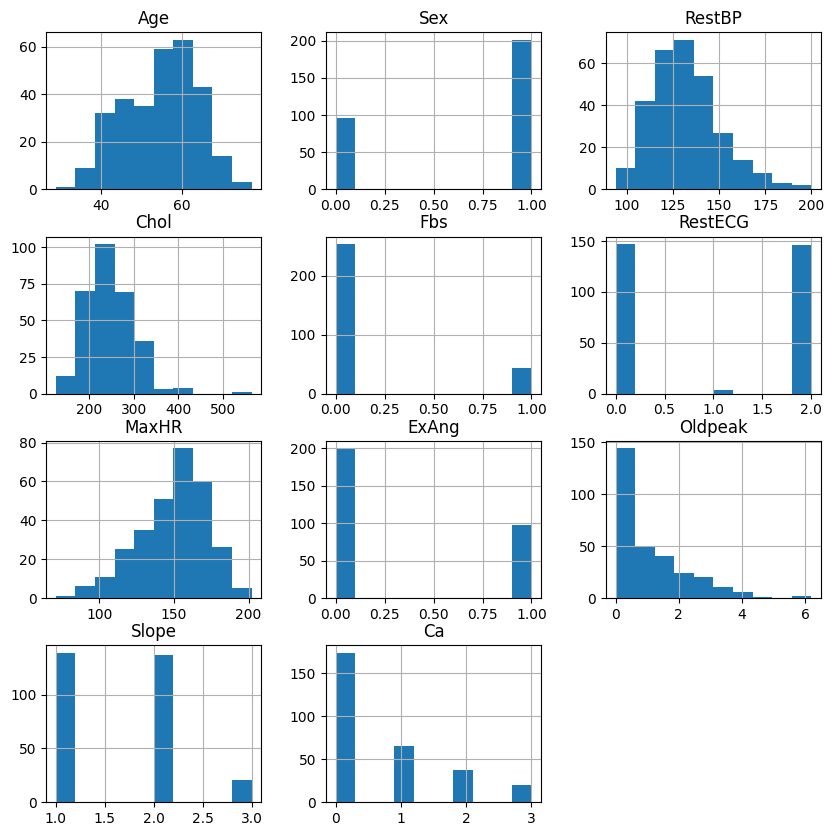

In [4]:
df.hist(figsize=(10,10));

<Axes: xlabel='AHD', ylabel='count'>

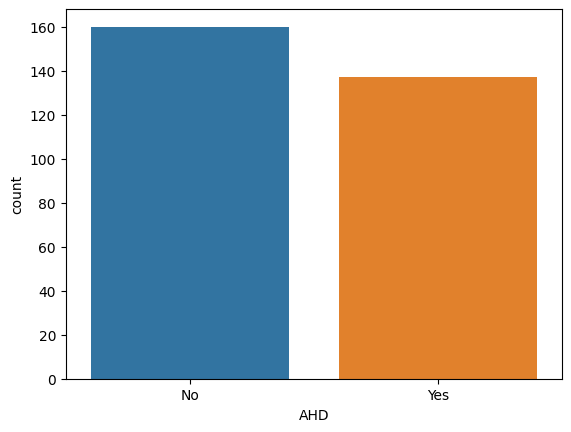

In [5]:
sns.countplot(data = df, x = "AHD")

In [6]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [7]:
from sklearn.model_selection import train_test_split
from utils import print_shapes

X, y = df.drop("AHD_Yes", axis=1), df["AHD_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
print_shapes(X_train, X_test, y_train, y_test)

X_train.shape = (198, 16)
X_test.shape  = (99, 16)
y_train.shape = (198,)
y_test.shape  = (99,)


## Random forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred



array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

## Hyperparameter tuning

In [9]:
from sklearn.model_selection import GridSearchCV

# coarse tuning
param_grid = {"n_estimators": [100, 150, 200, 300], "max_depth": [5, 10, 15, 20]}
# for more refined tuning, do repeat the process using parameters closer to the best parameters found in the coarse search

clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    scoring="recall",
)
clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [10]:
clf.fit(X_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [11]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

## Evaluation

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        53
           1       0.82      0.78      0.80        46

    accuracy                           0.82        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.82      0.82      0.82        99



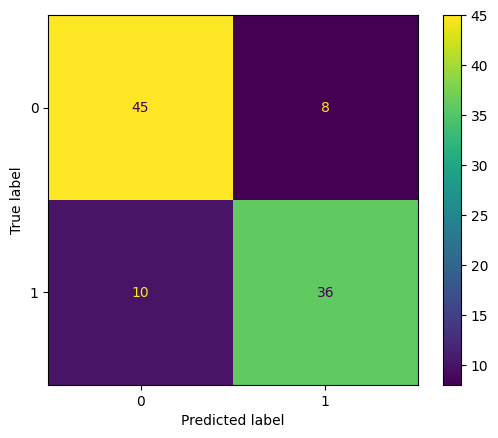

In [15]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = clf.predict(X_test)

def evaluate_classification(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

evaluate_classification(y_test, y_pred)

## Feature importance

NOTE: to do feature importance it's better to use one-hot encoding to not lose information on the dropped column  
This is left for the reader to do

In [20]:
model.feature_importances_

array([0.0931407 , 0.03372479, 0.07013429, 0.0792663 , 0.00730311,
       0.02068672, 0.1240207 , 0.04023465, 0.10045081, 0.02231842,
       0.17844666, 0.04327672, 0.00937807, 0.01567818, 0.09106361,
       0.07087628])

In [22]:
model.feature_importances_

1.0

In [30]:
feature_importance = pd.DataFrame([X.columns, model.feature_importances_]).T
feature_importance.columns =  ["Feature", "Importance"]
feature_importance.sort_values(by = "Importance", ascending=False, inplace = True)

<Axes: xlabel='Importance', ylabel='Feature'>

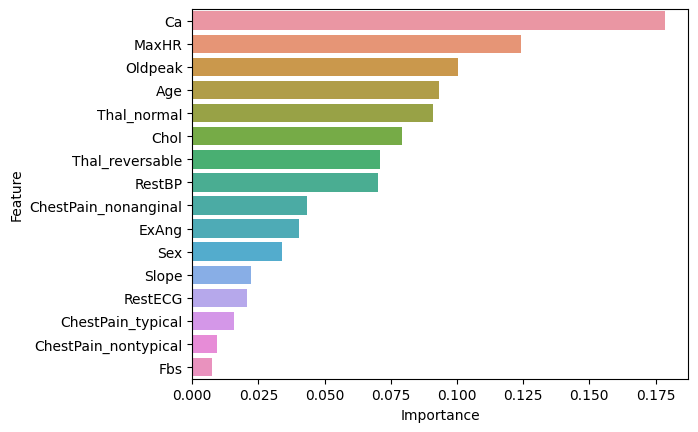

In [31]:
sns.barplot(data = feature_importance, x = "Importance", y="Feature")